In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, Markdown

import lingam
print("lingam=", lingam.__version__)

np.random.seed(0)

def _make_dag(n_features=8):
    sign = np.random.choice([-1, 1], size=(n_features, n_features))
    coef = np.random.uniform(0.1, 0.9, size=(n_features, n_features))
    sparse = np.random.choice([0, 1], p=[0.3, 0.7], size=(n_features, n_features))

    graph = np.tril(sign * coef * sparse, k=-1)
    graph[np.isclose(graph, 0)] = 0
    
    G = nx.from_numpy_array(graph.T, create_using=nx.DiGraph)
    causal_order = list(nx.topological_sort(G))
    
    return graph, causal_order

def _make_tau_coefs(tau_len, n_features=8):
    coefs = []
    for i in range(tau_len):
        sign = np.random.choice([-1, 1], size=(n_features, n_features))
        coef = np.random.uniform(0.1, 0.9, size=(n_features, n_features))
        sparse = np.random.choice([0, 1], p=[0.5, 0.5], size=(n_features, n_features))

        coef = sign * coef * sparse
        coef[np.isclose(coef, 0)] = 0
        
        coefs.append(coef)
    return coefs

def make_data_set(obs_duration=10, n_lags=1, n_samples=1000, n_features=8):
    es = []
    causal_orders = []
    B = []
    X = []

    # initial data
    for tau in range(n_lags):
        X.append(np.zeros((n_features, n_samples)))

    # generate twice the data and use the second half of the data
    for t in range(len(X), obs_duration * 2):
        B_t, causal_order = _make_dag(n_features=n_features)
        B_taus = _make_tau_coefs(n_lags, n_features)

        e = np.random.uniform(0.1, 1.0, size=(n_features, n_samples))

        mix_mat = np.linalg.pinv(np.eye(n_features) - B_t)
        N_t = mix_mat @ e
        M_t = mix_mat @ np.hstack(B_taus)
        X_t = M_t @ np.vstack(X[t - n_lags:]) + N_t

        es.append(e.T)
        causal_orders.append(causal_order)
        B.append([B_t, *B_taus])
        X.append(X_t)

    B = np.array(B)[-obs_duration:]
    X = np.array(X)[-obs_duration:]
    X = np.transpose(X, [0, 2, 1])
    
    return X, B, causal_orders, es

def show_scatter(B_est, B_true):
    n_rows, n_cols = B_true.shape[:2]
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))
    for t, (true, est) in enumerate(zip(B_true, B_est)):
        for tau, (t_, e_) in enumerate(zip(true, est)):
            ax = axes[t, tau]
            ax.scatter(t_, e_)
            
            ax.axvline(0, color="black", lw=0.5, zorder=0)
            ax.axhline(0, color="black", lw=0.5, zorder=0)
            ax.axline((0, 0), slope=1, color="red", lw=0.5, zorder=0)

            ax.set_aspect("equal", "box")
            ax.set_box_aspect(1)
            ax.set_xlabel("true coefs")
            ax.set_ylabel("estimated coefs")
            ax.set_title(f"tau={tau}")
            
            if t == 0:
                ax.set_title(f"tau={tau}")
        axes[t, 0].set_ylabel(f"t={t}")
        
    plt.tight_layout()
    plt.show()

lingam= 1.9.1


## データ作成

### n_lags=2

#### t=0時点の即時関係

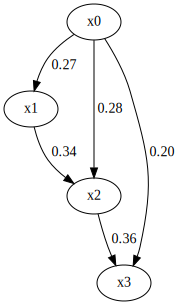

#### t=1時点の即時関係

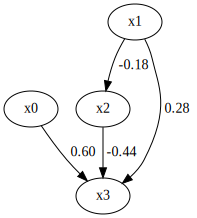

#### t=2時点の即時関係

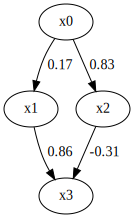

#### t=3時点の即時関係

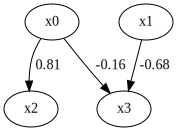

(4, 3, 4, 4)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.776095,0.000000,0.314787,0.831515,0.000000,0.000000
1,0.273728,0.000000,0.000000,0.0,-0.350709,-0.694122,0.000000,0.145213,0.000000,0.000000,0.000000,0.000000
2,0.281788,0.343347,0.000000,0.0,0.000000,0.000000,-0.472208,0.000000,0.000000,0.000000,0.000000,-0.586907
3,0.201671,0.000000,0.358534,0.0,0.000000,-0.833640,0.000000,0.000000,0.000000,0.000000,0.000000,0.381893
4,0.000000,0.000000,0.000000,0.0,0.000000,0.350004,0.000000,0.000000,0.695686,0.000000,0.267528,-0.805865
5,0.000000,0.000000,0.000000,0.0,-0.575716,-0.338456,0.000000,0.000000,-0.171283,0.000000,0.000000,0.000000
6,0.000000,-0.182797,0.000000,0.0,-0.661001,0.596876,0.000000,0.812274,0.000000,0.403142,0.000000,0.000000
7,0.600525,0.278952,-0.444622,0.0,0.000000,0.000000,0.668978,0.000000,0.000000,0.261251,0.346313,0.000000
8,0.000000,0.000000,0.000000,0.0,-0.560576,-0.109099,0.411975,0.000000,0.000000,0.707914,0.000000,0.000000
9,0.168686,0.000000,0.000000,0.0,-0.136907,0.000000,0.507179,0.000000,0.000000,0.257952,-0.400000,0.781958


[[ 1.97283662 -0.18478707  0.10444088  0.18043418]
 [ 0.71957293 -0.20456522 -0.7165877  -0.60025327]
 [ 1.68998277 -0.11389203  0.03474163  0.16134397]]
[[1.99287556 0.3209802  1.10929002 1.71681148]
 [1.06753772 1.09753816 1.54130283 0.36103422]
 [1.31866579 0.48225711 1.13949613 0.71351113]]
[[-0.65969127  1.54490832  0.42468917  3.34593802]
 [ 0.63600543 -0.17045554 -0.78153069  1.82585915]
 [-0.20381747  0.43150459  0.32563874  2.24268826]]
[[-0.94330265  1.71847526  1.51488238  2.6586977 ]
 [-0.06617564  0.2968146   1.09932831  1.94814682]
 [-0.59719478  1.65500354  1.63802384  2.08295154]]


In [2]:
n_lags = 2
display(Markdown(f"### n_lags={n_lags}"))

X, B, causal_orders, es = make_data_set(n_lags=n_lags, obs_duration=4, n_features=4)

for t, b in enumerate(B[:, 0]):
    display(Markdown(f"#### t={t}時点の即時関係"))
    display(lingam.utils.make_dot(b))

print(B.shape)
# (4, 3, 4, 4) -> (16, 12)
display(pd.DataFrame(np.hstack(np.hstack(B))))

print(X[0, :3])
print(X[1, :3])
print(X[2, :3])
print(X[3, :3])

## 事前知識を与えないとき＆与えるとき(全部-1)

### 与えない場合

<class 'list'> [[nan, nan, nan, nan], [0, 2, 1, 3], [0, 2, 1, 3]]


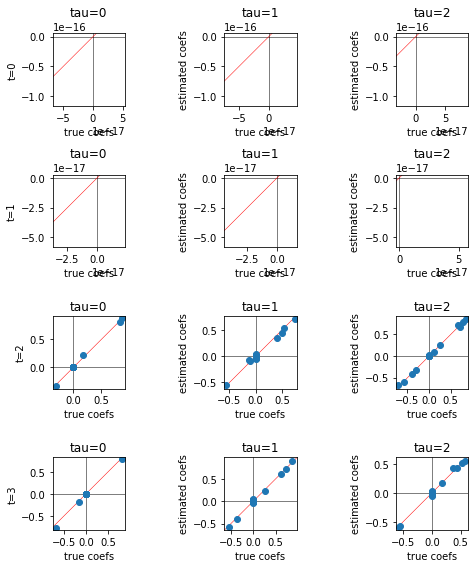

### 与える場合(ただし全部 -1)

<class 'list'> [[nan, nan, nan, nan], [nan, nan, nan, nan], [0, 2, 1, 3], [0, 2, 1, 3]]


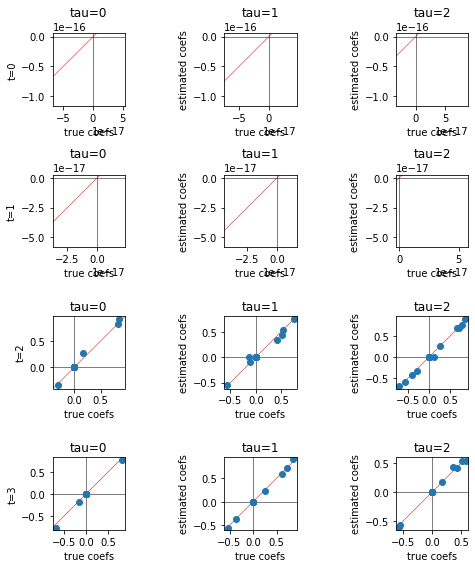

In [3]:
display(Markdown("### 与えない場合"))
model = lingam.LongitudinalLiNGAM(n_lags=n_lags)
model.fit(X)
print(type(model.causal_orders_), model.causal_orders_)
show_scatter(model.adjacency_matrices_, B)

display(Markdown("### 与える場合(ただし全部 -1)"))
pk = np.ones((4, n_lags + 1, 4, 4)) * -1
model = lingam.LongitudinalLiNGAM(n_lags=n_lags, prior_knowledge=pk)
model.fit(X)
print(type(model.causal_orders_), model.causal_orders_)
show_scatter(model.adjacency_matrices_, B)

## 事前知識を与える場合

In [4]:
# 事前知識の作成 (T, lag+1, p, p)
pk = np.ones((4, n_lags + 1, 4, 4)) * -1

print(pk.shape)

#　0と1は与えたところで推定には使われない。
t = 0
pk[t, 0][ 1, 0] = 0 # 元々存在するパスを消す
pk[t, 0][ 0, 3] = 1 # 元々存在するパスを強制

t = 1
pk[t, 0][0, 1] = 0 # 元々存在しないパスを消す
pk[t, 0][0, 2] = 1 # 元々存在しないパスを強制

t = 2
pk[t, 0][1, 0] = 0 # 元々存在するパスを消す
pk[t, 0][3, 0] = 1 # 元々存在するパスを強制

t = 3
pk[t, 0][0, 1] = 0 # 元々存在しないパスを消す
pk[t, 0][3, 2] = 1 # 元々存在しないパスを強制

model = lingam.LongitudinalLiNGAM(n_lags=n_lags, prior_knowledge=pk)
model.fit(X)

(4, 3, 4, 4)


#### t=2

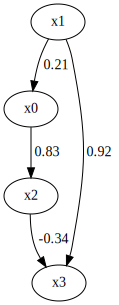

#### t=3

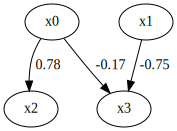

In [5]:
# t = 0とt = 1は使われない。
for t, b in enumerate(model.adjacency_matrices_[n_lags:, 0]):
    display(Markdown(f"#### t={t+n_lags}"))
    display(lingam.utils.make_dot(b))